In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create nodes dataframe

In [2]:
# Load data with format (node INDEX: IP INTERFACES)
data = pd.read_csv('kapar-midar-iff.nodes.txt',delimiter='\n', comment='#', header=None, names=['nodes'])

# INDEX: IP INTERFACES
data['nodes'] = data.nodes.str[5:]

# INDEX | IP INTERFACES
data['index'], data['ip'] = data.nodes.str.split(':').str

# Convert IP interfaces from string to list
data['ip'] = data['ip'].str[2:-1]
data['ip'] = data['ip'].str.split(' ')

nodes = data[['index', 'ip']]
nodes = nodes.set_index('index')

In [3]:
nodes.head(10)

,ip
index,
N1,"[59.152.193.141, 59.152.196.33, 59.152.200.125..."
N3,"[59.152.193.69, 59.152.193.73, 59.152.193.85, ..."
N4,"[42.61.0.89, 42.61.1.13, 42.61.1.57, 42.61.1.2..."
N6,"[181.129.43.145, 181.143.0.49, 181.143.2.225, ..."
N7,"[179.27.16.97, 179.27.16.153, 179.27.16.189, 1..."
N8,"[36.66.32.81, 36.66.32.89, 36.66.32.113, 36.66..."
N9,"[42.61.0.173, 42.61.0.217, 42.61.1.105, 42.61...."
N10,"[59.152.196.133, 59.152.196.205, 59.152.196.22..."
N11,"[179.27.0.37, 179.27.0.185, 179.27.0.229, 179...."


## Create links dataframe

In [4]:
# Remove IP address for nodes where interface is specified
def keep_nodes(x):
    nodes_list = []
    for n in x:
        nodes_list.append(n.split(':')[0])
    return nodes_list

In [5]:
# Load data with format (link INDEX: IP INTERFACES)
data = pd.read_csv('kapar-midar-iff.links.txt',delimiter='\n', comment='#', header=None, names=['links'])

# INDEX: IP INTERFACES
data['links'] = data.links.str[5:]

# INDEX | IP INTERFACES
data['index'], data['links'] = data['links'].str.split(':',1).str
data['links'] = data['links'].str[2:-1]

# INDEX: [IP INTERFACES]
data['links'] = data['links'].str.split(' ')
data['links'] = data['links'].apply(lambda x: keep_nodes(x))

links = data[['index', 'links']]
links = data.set_index('index')

In [6]:
links.head(10)

,links
index,
L2,"[N19943, N259125, N3071997, N10836, N26186, N2..."
L3,"[N259125, N191763, N286513, N132388, N308194, ..."
L4,"[N259125, N249665, N313955, N313955, N192431]"
L5,"[N111930, N332377, N1921700, N1921701, N192170..."
L6,"[N165312, N165312, N268658, N132226, N332377, ..."
L7,"[N255629, N332377, N255629, N9194, N1319060, N..."
L8,"[N231376, N332377, N305589, N147966, N260350, ..."
L9,"[N260350, N156862, N304749, N332377, N237172, ..."
L11,"[N332377, N67904, N236660, N325509, N256412, N..."


In [7]:
links.tail(10)

,links
index,
L104,"[N150307, N290306, N159745, N235964, N149157, ..."
L105,"[N150307, N49519, N2918234, N2918235, N2918236..."
L106,"[N313955, N320573, N236960, N133792, N1375, N2..."
L107,"[N257782, N320573, N1375, N299937, N239013, N2..."
L108,"[N242768, N320573, N305589, N2404962, N140683,..."
L109,"[N320573, N242768, N1375, N2405058, N239013, N..."
L110,"[N320573, N101232, N8994, N2405123, N2405124, ..."
L111,"[N320573, N313969, N305589, N177238, N327288, ..."
L112,"[N313955, N256395, N39902, N238529, N320473, N..."


## Add AS number to nodes

In [8]:
# Load data with format (node.AS INDEX AS TYPE)
data = pd.read_csv('kapar-midar-iff.nodes.as.txt',delimiter='\n', comment='#', header=None, names=['nodes'])

# INDEX AS TYPE
data['nodes'] = data.nodes.apply(lambda x: x[8:])

# INDEX | AS
data['node_index'], data['AS_number'] = data.nodes.str.split(' ').str

nodes_as = data[['node_index','AS_number']]
nodes_as = nodes_as.set_index(['node_index'])

In [9]:
# Add AS column to nodes dataframe
nodes = nodes.join(nodes_as)

In [10]:
nodes.head(10)

,ip,AS_number
index,,
N1,"[59.152.193.141, 59.152.196.33, 59.152.200.125...",9381
N3,"[59.152.193.69, 59.152.193.73, 59.152.193.85, ...",9381
N4,"[42.61.0.89, 42.61.1.13, 42.61.1.57, 42.61.1.2...",3758
N6,"[181.129.43.145, 181.143.0.49, 181.143.2.225, ...",13489
N7,"[179.27.16.97, 179.27.16.153, 179.27.16.189, 1...",6057
N8,"[36.66.32.81, 36.66.32.89, 36.66.32.113, 36.66...",17974
N9,"[42.61.0.173, 42.61.0.217, 42.61.1.105, 42.61....",3758
N10,"[59.152.196.133, 59.152.196.205, 59.152.196.22...",9381
N11,"[179.27.0.37, 179.27.0.185, 179.27.0.229, 179....",6057


## Add geo data to nodes

In [11]:
# Load data with format (node.geo INDEX: COUNTRY LATITUDE LONGITUDE)
data = pd.read_csv('kapar-midar-iff.nodes.geo.txt',delimiter='\n', comment='#', header=None, names=['nodes'])

# INDEX: COUNTRY LATITUDE LONGITUDE
data['nodes'] = data.nodes.str[9:-1]

# INDEX: | COUNTRY | LATITUDE | LONGITUDE
data['node_index'], data['continent'], data['country'], data['region'], data['city'], data['latitude'], data['longitude'],_,_,_ = data.nodes.str.split('\t').str

# INDEX | COUNTRY | LATITUDE | LONGITUDE
data['node_index'] = data['node_index'].str[:-1]

geo = data[['node_index','country','latitude','longitude']]
geo = geo.set_index('node_index')

In [12]:
nodes = nodes.join(geo)

In [13]:
nodes.head(10)

,ip,AS_number,country,latitude,longitude
index,,,,,
N1,"[59.152.193.141, 59.152.196.33, 59.152.200.125...",9381,HK,22.2910,114.1500
N3,"[59.152.193.69, 59.152.193.73, 59.152.193.85, ...",9381,HK,22.2910,114.1500
N4,"[42.61.0.89, 42.61.1.13, 42.61.1.57, 42.61.1.2...",3758,SG,1.2855,103.8565
N6,"[181.129.43.145, 181.143.0.49, 181.143.2.225, ...",13489,CO,6.2518,-75.5636
N7,"[179.27.16.97, 179.27.16.153, 179.27.16.189, 1...",6057,UY,-34.8581,-56.1708
N8,"[36.66.32.81, 36.66.32.89, 36.66.32.113, 36.66...",17974,ID,-6.1750,106.8286
N9,"[42.61.0.173, 42.61.0.217, 42.61.1.105, 42.61....",3758,SG,1.2855,103.8565
N10,"[59.152.196.133, 59.152.196.205, 59.152.196.22...",9381,HK,22.2910,114.1500
N11,"[179.27.0.37, 179.27.0.185, 179.27.0.229, 179....",6057,UY,-34.8581,-56.1708


## Observations

In [14]:
print('Number of nodes : {}'.format(len(nodes)))
print('Number of nodes without AS : {}'.format(len(nodes[nodes['AS_number'].isna()])))
print('Number of nodes without geo data : {}'.format(len(nodes[nodes['country'].isna()])))

Number of nodes : 100
Number of nodes without AS : 0
Number of nodes without geo data : 0


In [16]:
temp = nodes['ip'].apply(lambda x: len(x))
temp.describe().apply(lambda x: format(x, 'f'))

count    100.000000
mean     236.390000
std      125.352021
min      118.000000
25%      143.000000
50%      191.500000
75%      300.250000
max      722.000000
Name: ip, dtype: object

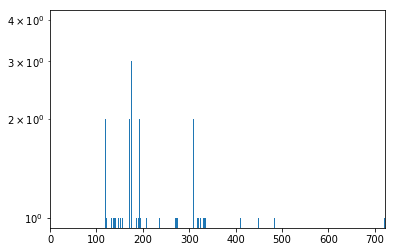

In [17]:
plt.hist(temp, bins = temp.max())
plt.xlim(0,temp.max())
plt.yscale('log')

## Create links for AS dataframe

In [18]:
dict_nodes_to_as = nodes_as.to_dict()['AS_number']

In [20]:
links_nodes = links.copy()

In [22]:
def apply_list(x):
    as_set = set()
    for elem in x:
        as_set.add(dict_nodes_to_as.get(elem, np.nan))
    return as_set

In [23]:
links_nodes['links'] = links_nodes['links'].apply(lambda x: apply_list(x))

In [24]:
links_nodes

,links
index,
L2,{nan}
L3,{nan}
L4,{nan}
L5,{nan}
L6,{nan}
L7,{nan}
L8,{nan}
L9,{nan}
L11,{nan}
